# Insurance charges prediction using Regression(Aditya Chowdhury)

Importing necessary libraries and loading the dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

ins=pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data shape

In [2]:
ins.shape

(1338, 7)

Data detailed information

In [3]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data description

In [4]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking Null Values

In [5]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking Missing Values

<AxesSubplot:>

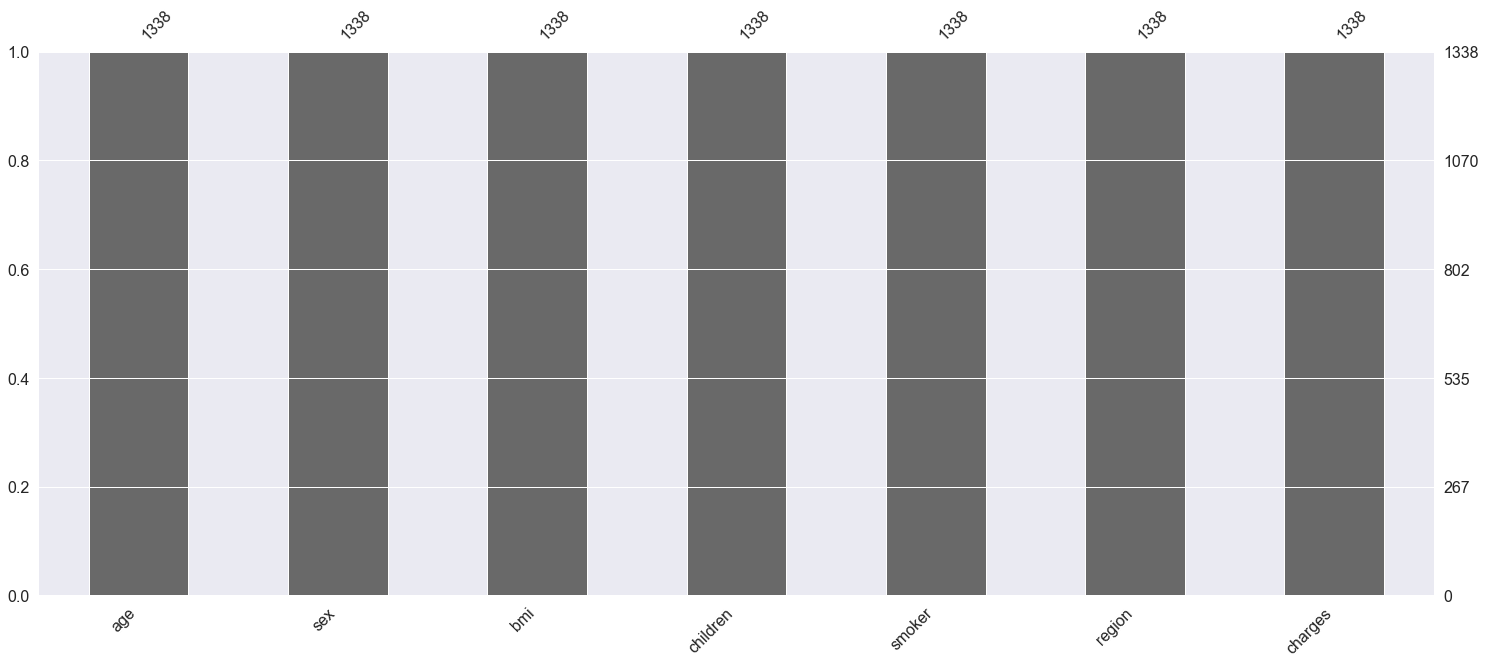

In [6]:
msno.bar(ins)

Checking Duplicate rows

In [7]:
ins[ins.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dropping duplicate rows

In [8]:
ins.drop_duplicates(inplace=True)
ins[ins.duplicated()]



,age,sex,bmi,children,smoker,region,charges


Outlier Detection

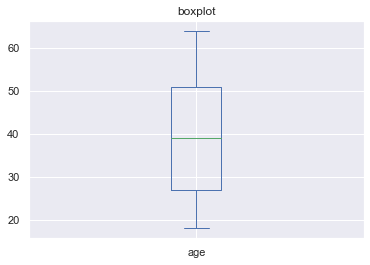

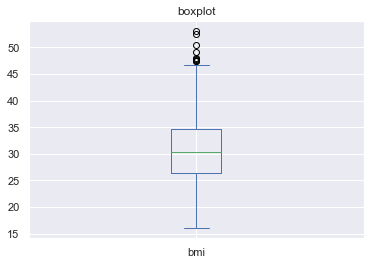

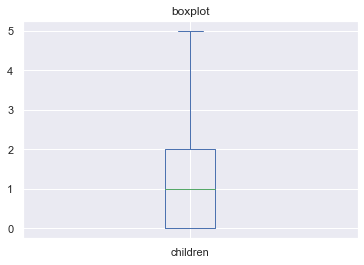

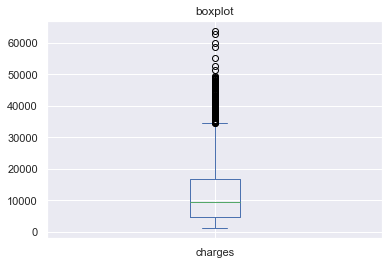

In [9]:
df=ins.drop(columns=['sex','smoker','region'])
for col in df:
    a=ins[col].plot(kind='box',title='boxplot')
    plt.show()

Outlier Treatment of data

In [10]:
Q1=ins['bmi'].quantile(.25)
Q3=ins['bmi'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
ins['bmi']=np.where(ins['bmi']>upper,upper,np.where(ins['bmi']<lower,lower,ins['bmi']))


Q1=ins['charges'].quantile(.25)
Q3=ins['charges'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
ins['charges']=np.where(ins['charges']>upper,upper,np.where(ins['charges']<lower,lower,ins['charges']))

Outliers have been treated

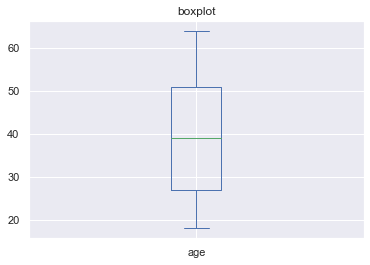

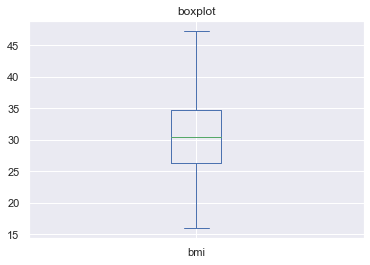

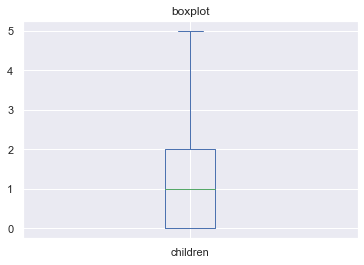

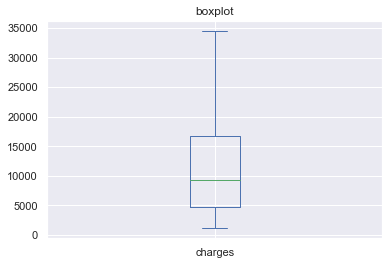

In [11]:
for col in df:
    a=ins[col].plot(kind='box',title='boxplot')
    plt.show()

Unique values for categorical columns

In [12]:
print(ins['sex'].unique())
print(ins['children'].unique())
print(ins['smoker'].unique())
print(ins['region'].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


Average charges by gender

In [13]:
ins_gen=pd.DataFrame(ins.groupby('sex')['charges'].mean())
ins_gen.sort_values(by=['charges'],ascending=False)

,charges
sex,
male,13026.640296
female,11945.164133


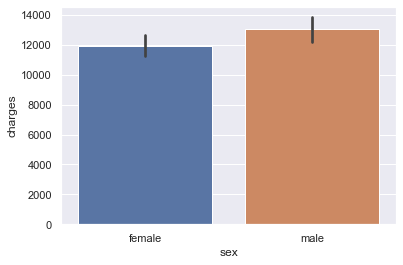

In [14]:
sns.barplot(x='sex',y='charges',data=ins)
plt.show()

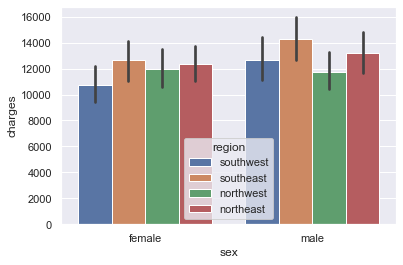

In [15]:
sns.barplot(x='sex',y='charges',hue='region',data=ins)
plt.show()

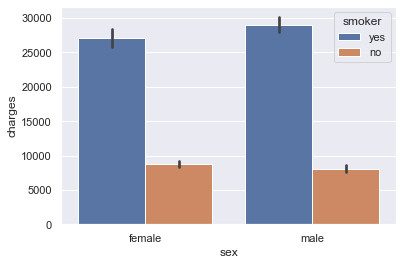

In [16]:
sns.barplot(x='sex',y='charges',hue='smoker',data=ins)
plt.show()

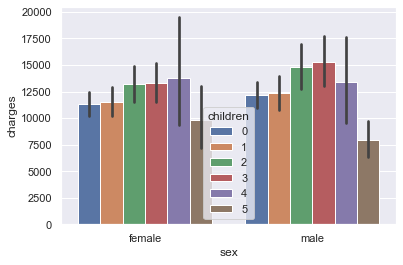

In [17]:
sns.barplot(x='sex',y='charges',hue='children',data=ins)
plt.show()

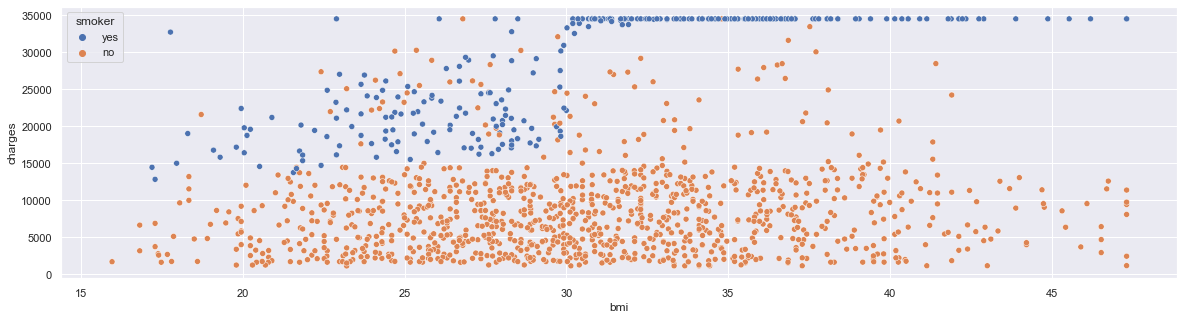

In [18]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=ins)
plt.show()

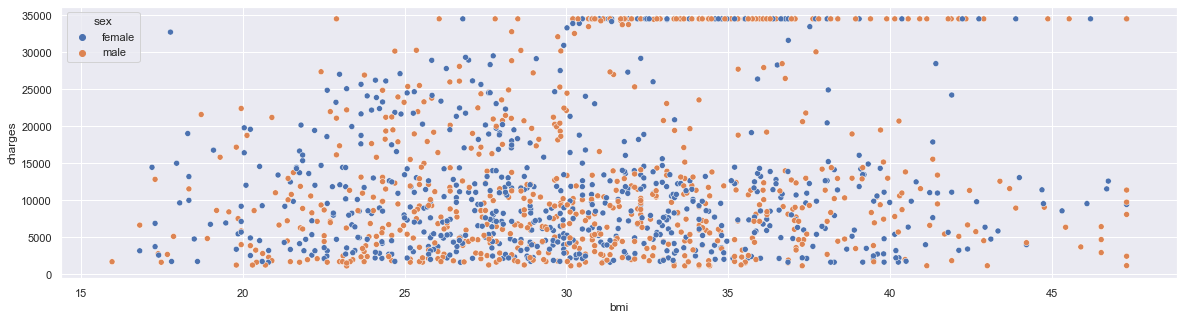

In [19]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=ins)
plt.show()

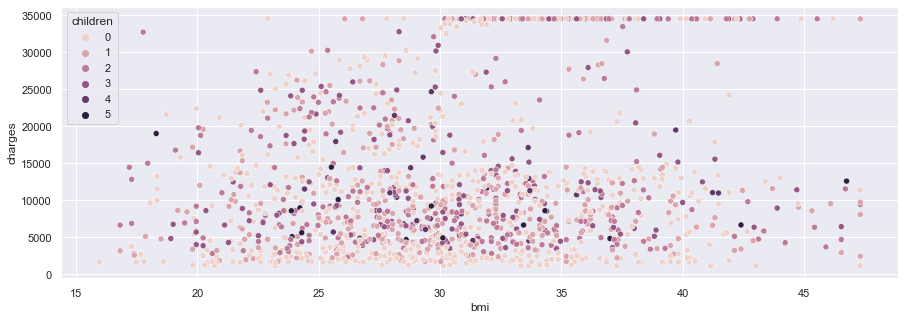

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='bmi',y='charges',hue='children',data=ins)
plt.show()

Average charges by region

In [21]:
a=pd.DataFrame(ins.groupby('region')['charges'].mean())
a.sort_values(by=['charges'],ascending=False)

,charges
region,
southeast,13481.364212
northeast,12792.060542
northwest,11881.950344
southwest,11689.491556


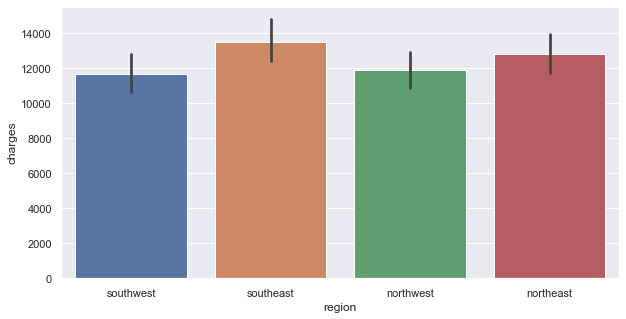

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='charges',data=ins)
plt.show()

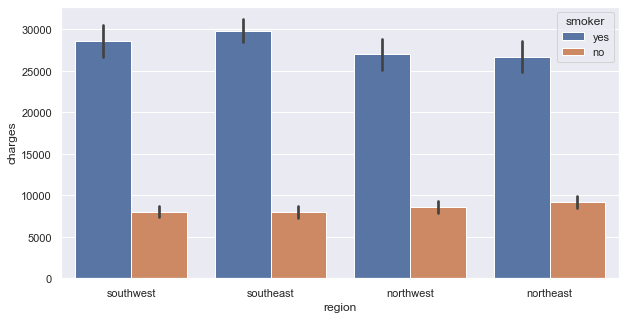

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='charges',hue='smoker',data=ins)
plt.show()

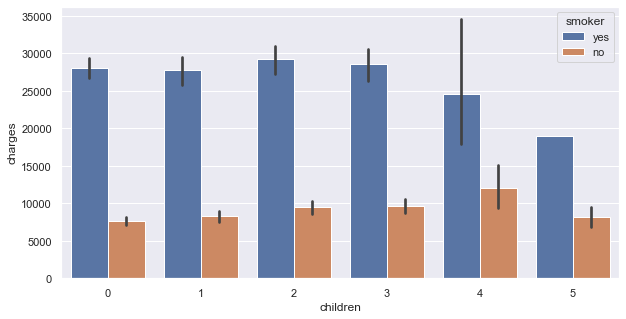

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='children',y='charges',hue='smoker',data=ins)
plt.show()

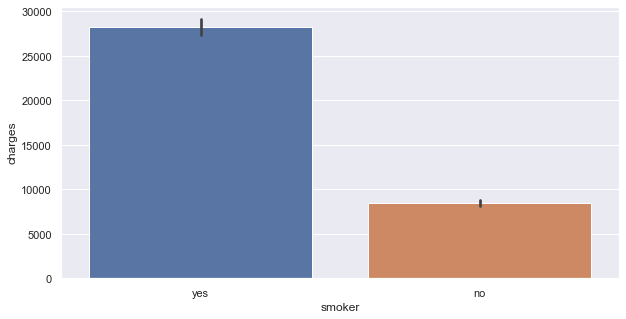

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='smoker',y='charges',data=ins)
plt.show()

Label Encoder for categorical columns

In [26]:
ins_1=ins
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(ins_1['sex'])
ins_1['sex']=label_encoder.transform(ins_1['sex'])
label_encoder.fit(ins_1['smoker'])
ins_1['smoker']=label_encoder.transform(ins_1['smoker'])
label_encoder.fit(ins_1['region'])
ins_1['region']=label_encoder.transform(ins_1['region'])



ins_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Data distribution

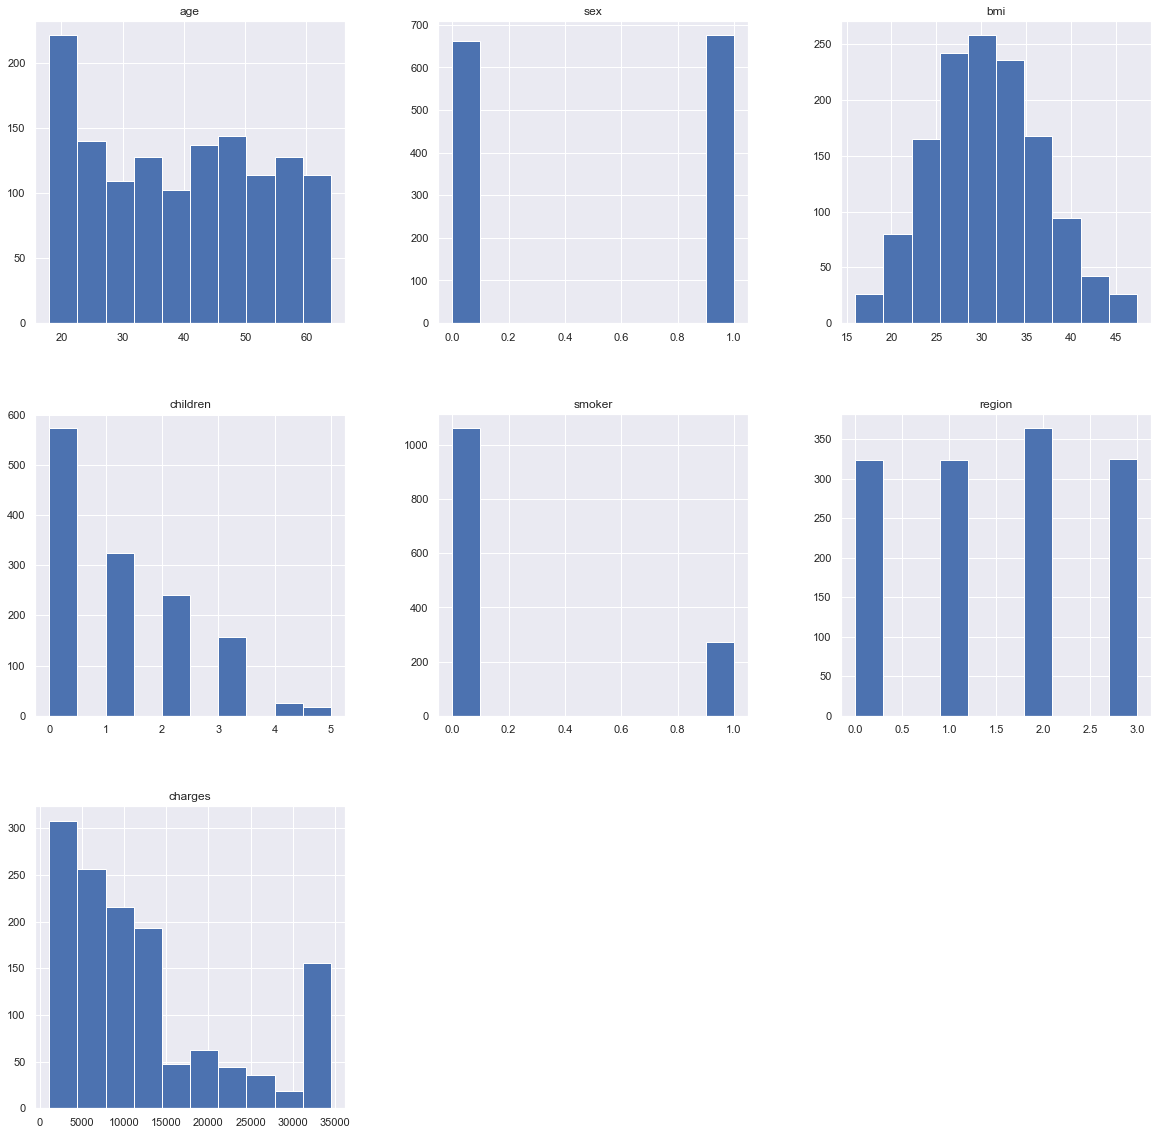

In [44]:
ins_1.hist(figsize=(20,20))
plt.show()

Correlation matrix

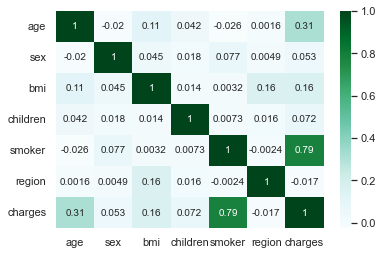

In [27]:
sns.heatmap(ins.corr(),cbar=True,cmap='BuGn',annot=True)
plt.show()

Splitting the dataset

In [28]:
x=ins_1.drop(['charges'],axis=1)
y=ins_1['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

Standardizing dataset

In [29]:
scaler=StandardScaler()
standardized_x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
standardized_x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
print(ins_1.shape)
print(standardized_x_train.shape)
print(y_train.shape)
print(standardized_x_test.shape)
print(y_test.shape)

(1337, 7)
(1069, 6)
(1069,)
(268, 6)
(268,)


# Machine Learning models

Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(standardized_x_train,y_train)
prediction=reg.predict(standardized_x_test)
print(prediction)

mae_linear=mean_absolute_error(y_test,prediction)
mape_linear=mean_absolute_percentage_error(y_test,prediction)
mse_linear=mean_squared_error(y_test,prediction)
rmse_linear=np.sqrt(mean_squared_error(y_test,prediction))
r2_linear=r2_score(y_test,prediction)
print('MAE=',mae_linear)
print('MAPE=',mape_linear)
print('MSE=',mse_linear)
print('RMSE=',rmse_linear)
print('R_Squared=',r2_linear)


[ 8188.93335788  5793.81689668 12789.0068105  26606.37365747
  7922.98374115 11713.06957672 25277.28618042  2206.478284
  9781.64759753 10573.34205418 10558.90957649 28476.17832854
 25984.85437471 14796.56705752  9365.2176779   8843.66148348
  3758.15274993 26780.1787645   3641.62336709  5469.17849933
  3730.79555645 25730.96060013 12976.15084476 25841.06878324
 26158.29008733  5171.58392616 29811.22290549 30937.56207534
 10524.32728881 12405.63966524  6168.51273008 11399.2159124
  1558.06489748 11241.87541096 32973.79185397 11051.25121352
  4642.2108241   4828.92004463 27185.29341152  8905.05932023
  5955.3284922  26317.84007272 29369.79809096 11057.79835263
  7911.22797233  3833.22977529  5169.71202245  8416.19200058
  4710.4247962   8460.7854436   6384.85388404 10065.3050306
 26931.43876125  3582.19895581  9620.95930859  9228.77431626
 10133.78924657  3356.01740292 26230.22666751  8749.44926627
 13621.28770892  7728.1467474  11621.0526238   2085.96807502
 14289.69410595 10426.842414

Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(standardized_x_train,y_train)
prediction=dtr.predict(standardized_x_test)
print(prediction)
mae_dtr=mean_absolute_error(y_test,prediction)
mape_dtr=mean_absolute_percentage_error(y_test,prediction)
mse_dtr=mean_squared_error(y_test,prediction)
rmse_dtr=np.sqrt(mean_squared_error(y_test,prediction))
r2_dtr=r2_score(y_test,prediction)
print('MAE=',mae_dtr)
print('MAPE=',mape_dtr)
print('MSE=',mse_dtr)
print('RMSE=',rmse_dtr)
print('R_Squared=',r2_dtr)


[ 9361.3268    4529.477    10848.1343   34524.777625  4837.5823
  8978.1851   34524.777625  1515.3449    7633.7206   10407.08585
 13616.3586   23065.4207   34524.777625 13470.86      5989.52365
  8520.026    18218.16139  34524.777625  3847.674     3561.8889
  1877.9294   20296.86345   8978.1851   19539.243    34524.777625
 26018.95052  34524.777625 34524.777625  8988.15875  28468.91901
  4134.08245   9386.1613    1720.3537   12913.9924   34524.777625
 10118.424     2801.2588    4906.40965  22218.1149    8240.5896
  2217.46915  21880.82     34524.777625  9174.13565   8515.7587
  3172.018     2217.46915   7633.7206    3956.07145   6600.361
 18218.16139   7050.0213   34524.777625  1256.299     7160.3303
  7726.854     9617.66245   3292.52985  34524.777625  7537.1639
 11552.904     5246.047    11741.726     1708.0014   12485.8009
 13047.33235   6067.12675  21774.32215  18223.4512   28287.89766
 10197.7722    2200.83085   7358.17565  23288.9284   10422.91665
  1727.785    12982.8747    5124

Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(standardized_x_train,y_train)
prediction=rfr.predict(standardized_x_test)
print(prediction)
mae_rfr=mean_absolute_error(y_test,prediction)
mape_rfr=mean_absolute_percentage_error(y_test,prediction)
mse_rfr=mean_squared_error(y_test,prediction)
rmse_rfr=np.sqrt(mean_squared_error(y_test,prediction))
r2_rfr=r2_score(y_test,prediction)
print('MAE=',mae_rfr)
print('MAPE=',mape_rfr)
print('MSE=',mse_rfr)
print('RMSE=',rmse_rfr)
print('R_Squared=',r2_rfr)


[ 9777.0399213   6093.278436   12960.8221093  34524.777625
  5253.8432923  10278.7336505  34520.5122835   2358.7823197
  7511.4031987  10791.2446754  14478.2745119  23733.6396215
 34523.7388925  15037.9655503   7962.9397586   9341.5505053
  6705.1654288  34524.777625    4398.0374812   3896.398655
  2862.0428079  20903.6945575   9685.72358    20026.07458415
 34524.777625   17994.7376733  34524.777625   34522.70016
 10665.2155395  13348.7969787   4077.6219715   9240.3983295
  2545.6964276  15410.7067686  34524.777625    9840.1884955
  7393.9703115   5907.7277963  23224.3048305  10774.4298397
  4817.0699616  21611.5306614  34524.777625    9631.0329881
  9037.6915407   4147.4724131   4870.047361    7541.0868763
  6754.0283603  12007.7275448   6436.063523   10617.5270511
 22792.82176     4250.9091578   7787.2774751   8023.374929
 10828.9794882   5395.5703922  34524.777625    7548.9758163
 10962.4050509   6001.0043446  15418.187585    1715.365273
 13938.1287865  15030.4228868   6859.9813774 

Support Vector Regression

In [34]:
from sklearn.svm import SVR
svr_1=SVR(kernel='rbf')
svr_1.fit(standardized_x_train,y_train)
prediction=svr_1.predict(standardized_x_test)
print(prediction)
mae_svr=mean_absolute_error(y_test,prediction)
mape_svr=mean_absolute_percentage_error(y_test,prediction)
mse_svr=mean_squared_error(y_test,prediction)
rmse_svr=np.sqrt(mean_squared_error(y_test,prediction))
r2_svr=r2_score(y_test,prediction)
print('MAE=',mae_svr)
print('MAPE=',mape_svr)
print('MSE=',mse_svr)
print('RMSE=',rmse_svr)
print('R_Squared=',r2_svr)


[9287.38305953 9269.86817951 9307.36960655 9337.16778031 9230.58927243
 9286.10715139 9322.70454578 9218.15948644 9253.67504622 9283.00719764
 9322.92076346 9363.61742833 9338.8083522  9325.48751216 9262.6487453
 9266.0144347  9212.24380505 9351.16090964 9231.74832743 9189.48086267
 9191.1853202  9342.53783732 9298.24575565 9345.06660028 9335.71599382
 9205.66377385 9342.98420701 9357.47984645 9295.32026093 9299.54574549
 9230.32241095 9289.23727669 9203.64065372 9312.30699352 9335.16351028
 9290.30741988 9285.50107609 9253.42822576 9346.85221187 9258.51144889
 9243.03075287 9337.36018906 9350.26745097 9296.49017186 9274.79862461
 9217.54607881 9244.4526389  9251.33069276 9197.20688722 9235.80909797
 9204.68889808 9281.27904852 9348.23213747 9198.80066814 9263.66938133
 9253.99352563 9291.233262   9205.93985811 9346.17788464 9242.71298512
 9306.73612657 9214.36943952 9301.62297648 9217.8663638  9308.85304903
 9304.05851893 9256.72879854 9344.8231927  9319.44478459 9343.38808608
 9295.9

Hyperparameter Tuning(Ridge Regression)

In [35]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
model=RidgeCV(alphas=np.arange(0,1,.01),cv=cv,scoring='neg_mean_absolute_error')
model.fit(standardized_x_train,y_train)
print('alpha(Ridge):',model.alpha_)

alpha(Ridge): 0.0


Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha='0.01')
rr.fit(standardized_x_train,y_train)
prediction=rr.predict(standardized_x_test)
print(prediction)
mae_ridge=mean_absolute_error(y_test,prediction)
mape_ridge=mean_absolute_percentage_error(y_test,prediction)
mse_ridge=mean_squared_error(y_test,prediction)
rmse_ridge=np.sqrt(mean_squared_error(y_test,prediction))
r2_ridge=r2_score(y_test,prediction)
print('MAE=',mae_ridge)
print('MAPE=',mape_ridge)
print('MSE=',mse_ridge)
print('RMSE=',rmse_ridge)
print('R_Squared=',r2_ridge)


[ 8188.97184035  5793.88282934 12789.00243336 26606.24859356
  7923.0378391  11713.08634964 25277.1590585   2206.56790983
  9781.66818301 10573.36866809 10558.9139863  28476.02456042
 25984.72838324 14796.53977649  9365.24328153  8843.70482988
  3758.24441323 26780.04805279  3641.71600043  5469.2393472
  3730.87172316 25730.83533617 12976.14514817 25840.94637342
 26158.14979411  5171.65040811 29811.05518362 30937.38851192
 10524.33653014 12405.65199885  6168.56189853 11399.23287375
  1558.17375612 11241.89219637 32973.58990679 11051.26021886
  4642.29169508  4828.98833621 27185.15152176  8905.08609898
  5955.3824803  26317.69757523 29369.6477895  11057.81459549
  7911.26339124  3833.30396849  5169.77383893  8416.22541874
  4710.49063567  8460.83239064  6384.90959008 10065.33147476
 26931.28915917  3582.28841905  9620.99727894  9228.81323944
 10133.81309466  3356.09541178 26230.10150396  8749.49156227
 13621.28081092  7728.18695906 11621.05546493  2086.06734634
 14289.6802246  10426.853

Hyperparameter Tuning(Lasso Regression)

In [37]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
model=LassoCV(alphas=np.arange(0,1,.01),cv=cv,n_jobs=-1)
model.fit(standardized_x_train,y_train)
print('alpha(Lasso):',model.alpha_)

alpha(Lasso): 0.99


Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0)
lasso.fit(standardized_x_train,y_train)
prediction=lasso.predict(standardized_x_test)
print(prediction)
mae_lasso=mean_absolute_error(y_test,prediction)
mape_lasso=mean_absolute_percentage_error(y_test,prediction)
mse_lasso=mean_squared_error(y_test,prediction)
rmse_lasso=np.sqrt(mean_squared_error(y_test,prediction))
r2_lasso=r2_score(y_test,prediction)
print('MAE=',mae_lasso)
print('MAPE=',mape_lasso)
print('MSE=',mse_lasso)
print('RMSE=',rmse_lasso)
print('R_Squared=',r2_lasso)


[ 8188.93335788  5793.81689668 12789.0068105  26606.37365747
  7922.98374115 11713.06957672 25277.28618042  2206.478284
  9781.64759753 10573.34205418 10558.90957649 28476.17832854
 25984.85437471 14796.56705752  9365.2176779   8843.66148348
  3758.15274993 26780.1787645   3641.62336709  5469.17849933
  3730.79555645 25730.96060013 12976.15084476 25841.06878324
 26158.29008733  5171.58392616 29811.22290549 30937.56207534
 10524.32728881 12405.63966524  6168.51273008 11399.2159124
  1558.06489748 11241.87541096 32973.79185397 11051.25121352
  4642.2108241   4828.92004463 27185.29341152  8905.05932023
  5955.3284922  26317.84007272 29369.79809096 11057.79835263
  7911.22797233  3833.22977529  5169.71202245  8416.19200058
  4710.4247962   8460.7854436   6384.85388404 10065.3050306
 26931.43876125  3582.19895581  9620.95930859  9228.77431626
 10133.78924657  3356.01740292 26230.22666751  8749.44926627
 13621.28770892  7728.1467474  11621.0526238   2085.96807502
 14289.69410595 10426.842414

Hyperparameter Tuning(Elastic Net Regression)

In [40]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
ratios=np.arange(0,1,.01)
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]
model=ElasticNetCV(l1_ratio=ratios,alphas=alphas,cv=cv,n_jobs=-1)
model.fit(standardized_x_train,y_train)
print('alpha(Elastic Net):',model.alpha_)
print('l1_ratio:',model.l1_ratio_)

alpha(Elastic Net): 0.1
l1_ratio: 0.97


Elastic Net Regression

In [41]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=.001,l1_ratio=0)
elastic.fit(standardized_x_train,y_train)
prediction=elastic.predict(standardized_x_test)
print(prediction)
mae_elastic=mean_absolute_error(y_test,prediction)
mape_elastic=mean_absolute_percentage_error(y_test,prediction)
mse_elastic=mean_squared_error(y_test,prediction)
rmse_elastic=np.sqrt(mean_squared_error(y_test,prediction))
r2_elastic=r2_score(y_test,prediction)
print('MAE=',mae_elastic)
print('MAPE=',mape_elastic)
print('MSE=',mse_elastic)
print('RMSE=',rmse_elastic)
print('R_Squared=',r2_elastic)


[ 8193.04304115  5800.8575253  12788.53939418 26593.01675615
  7928.75971061 11714.85967528 25263.71107474  2216.05028174
  9783.84638628 10576.18313526 10559.38180223 28459.7572089
 25971.39915434 14793.6541777   9367.95224449  8848.289444
  3767.94058791 26766.21917716  3651.51475655  5475.67702533
  3738.93016215 25717.58322213 12975.54251933 25827.99580565
 26143.30892213  5178.68383329 29793.31182442 30919.02663689
 10525.31503741 12406.9554159   6173.76453197 11401.02643708
  1569.68939698 11243.66728051 32952.22628845 11052.21328547
  4650.84632368  4836.21328066 27170.14081569  8907.91968792
  5961.09473963 26302.62348185 29353.74593261 11059.53253491
  7915.01106799  3841.15370057  5176.31424116  8419.7612045
  4717.45659664  8465.7979402   6390.80293393 10068.12860834
 26915.46362852  3591.75226328  9625.01297452  9232.92999995
 10136.33570764  3364.3488502  26216.8595457   8753.96525942
 13620.55053388  7732.44143125 11621.35645709  2096.56922758
 14288.2112647  10427.989647

Comparing all the algorithms to determine the best one

In [42]:
MAE= {'Linear Regression':mae_linear,'Decision Tree Regression':mae_dtr,
      'Random Forest Regression':mae_rfr,'Support Vector Regression':mae_svr,
      'Ridge Regression':mae_ridge,'Lasso Regression':mae_lasso,
      'Elastic Net Regression':mae_elastic}

MAPE={'Linear Regression':mape_linear,'Decision Tree Regression':mape_dtr,
      'Random Forest Regression':mape_rfr,'Support Vector Regression':mape_svr,
      'Ridge Regression':mape_ridge,'Lasso Regression':mape_lasso,
      'Elastic Net Regression':mape_elastic}

 
MSE={'Linear Regression':mse_linear,'Decision Tree Regression':mse_dtr,
     'Random Forest Regression':mse_rfr,'Support Vector Regression':mse_svr,
     'Ridge Regression':mse_ridge,'Lasso Regression':mse_lasso,
     'Elastic Net Regression':mse_elastic}

RMSE={'Linear Regression':rmse_linear,'Decision Tree Regression':rmse_dtr,
      'Random Forest Regression':rmse_rfr,'Support Vector Regression':rmse_svr,
      'Ridge Regression':rmse_ridge,'Lasso Regression':rmse_lasso,
      'Elastic Net Regression':rmse_elastic}

R2={'Linear Regression':r2_linear,'Decision Tree Regression':r2_dtr,
    'Random Forest Regression':r2_rfr,'Support Vector Regression':r2_svr,
    'Ridge Regression':r2_ridge,'Lasso Regression':r2_lasso,
    'Elastic Net Regression':r2_elastic}



dict={'Mean Absolute Error':MAE,'Mean Absolute Percentage Error':MAPE,
      'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
      'R-Squared':R2}
eval_metric_comp=pd.DataFrame(dict)
eval_metric_comp

,Mean Absolute Error,Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error,R-Squared
Linear Regression,3074.737224,0.326487,2.205580e+07,4696.360101,0.811253
Decision Tree Regression,2453.937656,0.385515,3.474844e+07,5894.780623,0.702633
Random Forest Regression,2178.606302,0.324194,1.726598e+07,4155.234970,0.852243
Support Vector Regression,8038.869166,1.023528,1.302553e+08,11412.945026,-0.114688
Ridge Regression,3074.764104,0.326494,2.205598e+07,4696.379436,0.811251
Lasso Regression,3074.737224,0.326487,2.205580e+07,4696.360101,0.811253
Elastic Net Regression,3077.607692,0.327170,2.207527e+07,4698.432848,0.811086


# Conclusion

So we can conclude that Random Forest Regression gives the best results